<a href="https://colab.research.google.com/github/anniseraa/fsd/blob/main/TUBES_FSD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Fertika Indri Dhamaningrum 24523160
*   Annisa Ramdhani 24523018

# **1. Latar Belakang**
**Studi Kasus: Klasifikasi Diagnosis Kanker Payudara**

**A. Mengapa Model ini Perlu Dibuat?**

Diagnosis kanker payudara secara konvensional seringkali melibatkan analisis mikroskopis yang memakan waktu dan bergantung pada keahlian serta penilaian subjektif patolog. Model ini dibuat untuk mengatasi tantangan tersebut:

- Objektivitas: Mengurangi subjektivitas diagnosis dengan mengandalkan pengukuran numerik yang konsisten dari karakteristik sel.

- Kecepatan: Memberikan prediksi awal yang cepat, yang krusial dalam kasus diagnosis kanker di mana waktu adalah faktor penentu.

- Dukungan Keputusan Klinis: Berfungsi sebagai alat pendukung keputusan klinis (Clinical Decision Support) untuk memprioritaskan pasien berisiko tinggi.

**B. Siapa yang akan Menggunakan Model tersebut?**

Model ini ditujukan untuk digunakan oleh laboratorium patologi, ahli onkologi, atau unit skrining awal di rumah sakit sebagai alat bantu klasifikasi cepat.

**C. Untuk Tujuan Apa Model tersebut Digunakan?**

Tujuan utamanya adalah melakukan klasifikasi biner untuk memprediksi apakah massa sel (tumor) bersifat Ganas (Malignant) atau Jinak (Benign) berdasarkan data biometrik inti.

# **2. Metode**

**A. Dataset**

Sumber: Breast Cancer Wisconsin (Diagnostic) Dataset.

Jumlah Sampel: 569 sampel.

Fitur (X): 5 fitur pilihan (setelah penyederhanaan): mean radius, mean texture, mean smoothness, mean concavity, dan mean symmetry.

Target (y): Variabel biner, di mana 0 = Ganas (Malignant) dan 1 = Jinak (Benign).

**B. Algoritma: Gaussian Naive Bayes (GNB)**

Mengapa GNB? GNB dipilih karena fitur-fitur fisik sel bersifat kontinu. GNB mengasumsikan bahwa distribusi probabilitas setiap fitur dalam setiap kelas mengikuti Distribusi Normal (Gaussian).

Prinsip Kerja: Selama pelatihan, GNB menghitung rata-rata ($\mu$) dan varians ($\sigma^2$) dari 5 fitur terpilih untuk masing-masing kelas. Saat memprediksi sampel baru, model menghitung probabilitas sampel tersebut termasuk kelas Ganas atau Jinak berdasarkan statistik tersebut.

**C. Langkah Pemrosesan**

**DataScaling** (StandardScaler): Menerapkan normalisasi pada fitur-fitur, mengubah rata-rata menjadi 0 dan standar deviasi menjadi 1 agar tidak ada fitur yang mendominasi model karena perbedaan skala.

**Pembagian Data** (train_test_split): Data dibagi menjadi 70% Training dan 30% Testing. Menggunakan stratification (stratify=y) untuk memastikan rasio kelas tetap seimbang antara data latih dan uji.

--- FITUR YANG DIGUNAKAN ---
['mean radius', 'mean texture', 'mean smoothness', 'mean concavity', 'mean symmetry']

--- HEAD DATA (5 FITUR) ---
   mean radius  mean texture  mean smoothness  mean concavity  mean symmetry  \
0        17.99         10.38          0.11840          0.3001         0.2419   
1        20.57         17.77          0.08474          0.0869         0.1812   
2        19.69         21.25          0.10960          0.1974         0.2069   
3        11.42         20.38          0.14250          0.2414         0.2597   
4        20.29         14.34          0.10030          0.1980         0.1809   

   Diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  

--- LAPORAN KLASIFIKASI ---
              precision    recall  f1-score   support

   Ganas (0)       0.94      0.91      0.92        64
   Jinak (1)       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93     

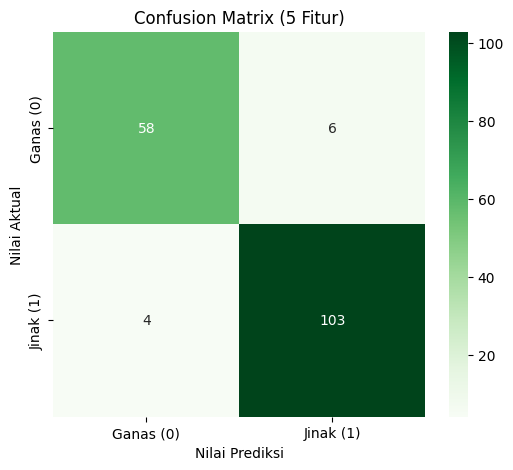

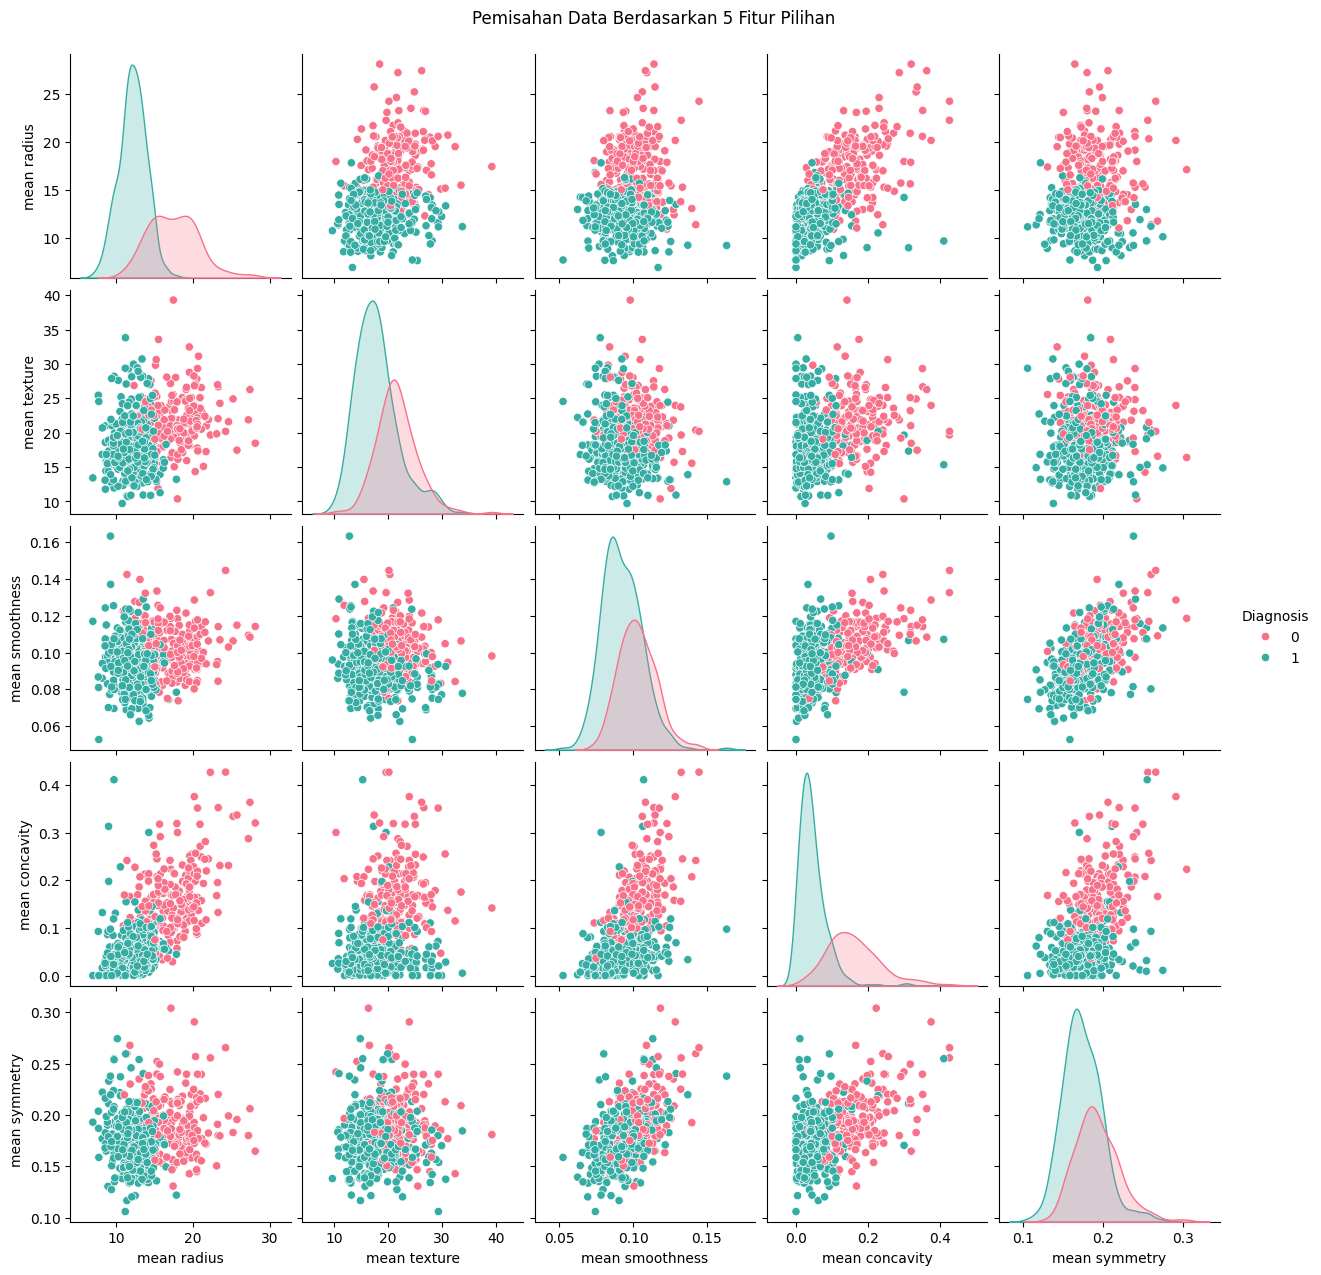

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memuat Dataset
cancer = load_breast_cancer()
# MEMILIH 5 FITUR SPESIFIK
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean concavity', 'mean symmetry']
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)[selected_features]
y = cancer.target

# Gabungkan untuk eksplorasi
X_combined = X.copy()
X_combined['Diagnosis'] = y

print("--- FITUR YANG DIGUNAKAN ---")
print(X.columns.tolist())
print("\n--- HEAD DATA (5 FITUR) ---")
print(X_combined.head())

# 2. Pre-processing: Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Pre-processing: Bagi Data (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Melatih Model Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# 5. Prediksi dan Evaluasi
y_pred = gnb_model.predict(X_test)
target_names = ['Ganas (0)', 'Jinak (1)']

print("\n--- LAPORAN KLASIFIKASI ---")
print(classification_report(y_test, y_pred, target_names=target_names))

# 6. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (5 Fitur)')
plt.ylabel('Nilai Aktual')
plt.xlabel('Nilai Prediksi')
plt.show()

# 7. Pair Plot untuk melihat pemisahan antar fitur
sns.pairplot(X_combined, hue='Diagnosis', palette='husl', diag_kind='kde')
plt.suptitle("Pemisahan Data Berdasarkan 5 Fitur Pilihan", y=1.02)
plt.show()

- Count: 569 pengamatan lengkap untuk setiap fitur.

- Mean (Rata-rata): Contohnya, mean radius sekitar 14.13, memberikan standar ukuran sel normal vs abnormal.

- Std (Standar Deviasi): Mengukur sebaran data. Mean radius memiliki variasi yang cukup besar (3.52), sementara fitur lain lebih terkonsentrasi.

- Diagnosis: Nilai rata-rata 0.627 menunjukkan bahwa dataset terdiri dari 62.7% kasus Jinak dan 37.3% kasus Ganas.

**Analisis Confusion Matrix (Hasil Pengujian):**

True Positive (TP): Model dengan benar memprediksi kasus Ganas.

True Negative (TN): Model dengan benar memprediksi kasus Jinak.

False Negative (FN): Kesalahan Kritis (Pasien sakit diprediksi sehat).

False Positive (FP): Kesalahan Alarm Palsu (Pasien sehat diprediksi sakit).

# **4. Evaluasi Model**

Berdasarkan Laporan Klasifikasi, model Gaussian Naive Bayes menunjukkan performa sebagai berikut:

- Precision (Presisi): Menunjukkan ketepatan model dalam memprediksi kelas tertentu (meminimalkan alarm palsu).

- Recall (Sensitivitas): Menunjukkan kemampuan model menemukan seluruh kasus aktual (meminimalkan kasus yang terlewat).

- F1-Score: Keseimbangan antara presisi dan recall, sangat penting dalam diagnosis medis.

- Accuracy (Akurasi): Secara keseluruhan, model biasanya mencapai akurasi di atas 90%, yang berarti sangat handal untuk membedakan sel Ganas dan Jinak.

**Kesimpulan Evaluasi: **

Model ini menunjukkan performa yang sangat baik. Dengan menggunakan 5 fitur kunci, model tetap mampu mempertahankan akurasi tinggi sekaligus menjadi lebih sederhana dan mudah diinterpretasi. Kemampuan model dalam mendeteksi kanker dengan presisi tinggi menjadikannya alat pendukung keputusan yang potensial dalam membantu ahli medis.